In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('dataset_full_refined.csv')
df['date'] = pd.to_datetime(df['date'])

In [2]:
df.head(5)

,date,day,campus,weather,count,meal,soup,main_dish,vegetarian,side_dishes,dessert
0,2024-01-01,monday,kuzey,14.58,420,lunch,toyga corba,adana kofte,bugdayli pazi,mercimekli bulgur pilavi,"salata, meyve, portakalli gazoz"
1,2024-01-02,tuesday,kuzey,12.63,1626,lunch,alaca corba,tas kebabi,zy. bruksel lahanasi,eriste,"profiterol, mor salata, gazoz"
2,2024-01-03,wednesday,kuzey,14.18,1686,lunch,kafkas corba,meksika soslu tavuk,zy.kereviz,"nohutlu pirinc pilavi, kuskus","salata, ayran, lokma tatlisi"
3,2024-01-04,thursday,kuzey,15.45,1033,lunch,tavuk suyu corba,kiymali ispanak,bugdayli nohutlu ispanak,"soslu makarna, su boregi","puding, salata, meyve"
4,2024-01-05,friday,kuzey,14.11,1360,lunch,safak corba,bahcivan kebabi,bezelye yemegi,"sehriyeli pirinc pilavi, bulgur pilavi","cacik, soda, salata"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2298 entries, 0 to 2297
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         2298 non-null   datetime64[ns]
 1   day          2298 non-null   object        
 2   campus       2298 non-null   object        
 3   weather      2298 non-null   float64       
 4   count        2298 non-null   int64         
 5   meal         2298 non-null   object        
 6   soup         2286 non-null   object        
 7   main_dish    2286 non-null   object        
 8   vegetarian   2298 non-null   object        
 9   side_dishes  2298 non-null   object        
 10  dessert      2298 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 197.6+ KB


In [4]:
df.describe()

,date,weather,count
count,2298,2298.000000,2298.000000
mean,2024-04-08 22:47:56.240208896,15.072900,258.828982
min,2024-01-01 00:00:00,0.820000,0.000000
25%,2024-02-17 00:00:00,8.980000,29.000000
50%,2024-04-05 00:00:00,14.430000,103.000000
75%,2024-05-23 00:00:00,20.295000,273.750000
max,2024-10-28 00:00:00,35.620000,2323.000000
std,NaN,7.211731,407.236784


In [5]:
# Extract month from date
df['month'] = pd.to_datetime(df['date']).dt.to_period('M')

# Group by month and meal, calculate averages
monthly_meal_summary = df.groupby([df['month'], 'meal']).agg({
    'weather': 'mean',
    'count': 'mean'
}).reset_index()

# Rename columns for clarity
monthly_meal_summary.columns = ['Month', 'Meal', 'Avg Weather', 'Avg Count']

# Sort by month and meal
monthly_meal_summary = monthly_meal_summary.sort_values(['Month', 'Meal'])

# Display the results
print("Monthly Meal Analysis:")
display(monthly_meal_summary)

# Optional: Save to CSV if needed
monthly_meal_summary.to_csv('monthly_meal_analysis.csv', index=False)

# Additional insights
print("\nSummary Statistics:")
print("Total unique months:", monthly_meal_summary['Month'].nunique())
print("Meals analyzed:", monthly_meal_summary['Meal'].unique())

Monthly Meal Analysis:


,Month,Meal,Avg Weather,Avg Count
0,2024-01,dinner,6.857258,134.268817
1,2024-01,lunch,9.139032,208.672043
2,2024-02,dinner,8.299828,206.695402
3,2024-02,lunch,12.423103,494.810345
4,2024-03,dinner,8.612903,328.161290
5,2024-03,lunch,13.661559,351.580645
6,2024-04,dinner,13.700889,239.222222
7,2024-04,lunch,19.029611,319.072222
8,2024-05,dinner,14.404409,273.510753
9,2024-05,lunch,18.733548,412.860215



Summary Statistics:
Total unique months: 8
Meals analyzed: ['dinner' 'lunch']


In [6]:
# Analyze Main Dishes
print("Main Dish Frequency Analysis:")
main_dish_counts = df['main_dish'].value_counts()
print("Total Unique Main Dishes:", len(main_dish_counts))
print("\nTop 20 Main Dishes:")
display(main_dish_counts.head(20))

print("\n\nVegetarian Option Frequency Analysis:")
vegetarian_counts = df['vegetarian'].value_counts()
print("Total Unique Vegetarian Options:", len(vegetarian_counts))
print("\nTop 20 Vegetarian Options:")
display(vegetarian_counts.head(20))

# Optional: Save results to CSV files
main_dish_counts.to_csv('main_dish_frequencies.csv')
vegetarian_counts.to_csv('vegetarian_option_frequencies.csv')



Main Dish Frequency Analysis:
Total Unique Main Dishes: 128

Top 20 Main Dishes:


main_dish
etli nohut                96
etli taze fasulye         85
kiymali ispanak           84
kiymali yesil mercimek    78
izmir kofte               73
etli bezelye              73
bahcivan kebabi           54
etli manti                54
etli kuru fasulye         50
etli guvec                49
et doner                  46
tas kebabi                44
tavuk doner               43
orman kebabi              43
meksika soslu tavuk       43
etli turlu                42
eksili kofte              36
firin kofte               36
etli barbunya             36
sucuklu kuru fasulye      36
Name: count, dtype: int64



Vegetarian Option Frequency Analysis:
Total Unique Vegetarian Options: 86

Top 20 Vegetarian Options:


vegetarian
falafel                  147
mucver                   110
bezelye yemegi           103
harput kofte              96
etsiz nohut               96
yesil mercimek yemegi     79
zy. bruksel lahanasi      78
etsiz kuru fasulye        74
zy.brokoli                72
mantar sote               68
nohutlu kabak             66
sebze buketi              56
saksuka                   50
zy.barbunya               48
ispanak yemegi            48
etsiz taze fasulye        43
vegan manti               42
patates graten            37
zy. patlican dolma        36
sebze guvec               36
Name: count, dtype: int64

In [7]:
# Create month and day of week columns
df['month'] = pd.to_datetime(df['date']).dt.to_period('M')

# Group by month, day of week, and meal, calculate average count
monthly_day_meal_avg = df.groupby([
    'month', 
    'day', 
    'meal'
])['count'].mean().reset_index()

# Sort the results for readability
monthly_day_meal_avg = monthly_day_meal_avg.sort_values(['month', 'day', 'meal'])

# Display the results
print("Monthly Average Count by Day and Meal:")
display(monthly_day_meal_avg)

# Optional: Save to CSV
monthly_day_meal_avg.to_csv('monthly_day_meal_avg_count.csv', index=False)

# Additional Insights
print("\nAdditional Insights:")
print("Total unique months:", monthly_day_meal_avg['month'].nunique())
print("Days of week analyzed:", monthly_day_meal_avg['day'].unique())
print("Meal types:", monthly_day_meal_avg['meal'].unique())

# Pivot table for easier viewing
pivot_table = monthly_day_meal_avg.pivot_table(
    index=['month', 'day'], 
    columns='meal', 
    values='count'
)
print("\nPivot Table View:")
display(pivot_table)

# Optional: Save pivot table to CSV
pivot_table.to_csv('monthly_day_meal_avg_count_pivot.csv')

Monthly Average Count by Day and Meal:


,month,day,meal,count
0,2024-01,friday,dinner,155.833333
1,2024-01,friday,lunch,267.750000
2,2024-01,monday,dinner,154.400000
3,2024-01,monday,lunch,220.100000
4,2024-01,saturday,dinner,49.666667
...,...,...,...,...
91,2024-10,friday,lunch,145.000000
92,2024-10,monday,lunch,246.500000
93,2024-10,thursday,lunch,288.500000
94,2024-10,tuesday,lunch,392.500000



Additional Insights:
Total unique months: 8
Days of week analyzed: ['friday' 'monday' 'saturday' 'sunday' 'thursday' 'tuesday' 'wednesday']
Meal types: ['dinner' 'lunch']

Pivot Table View:


meal                   dinner       lunch
month   day                              
2024-01 friday     155.833333  267.750000
        monday     154.400000  220.100000
        saturday    49.666667   65.041667
        sunday      84.791667   79.583333
        thursday   162.333333  230.000000
        tuesday    132.633333  295.466667
        wednesday  183.333333  264.300000
2024-02 friday     112.041667  446.458333
        monday     275.666667  701.416667
        saturday   101.416667  116.958333
        sunday     163.916667   94.958333
        thursday   216.100000  596.133333
        tuesday    296.791667  667.708333
        wednesday  278.583333  814.708333
2024-03 friday     282.133333  426.966667
        monday     421.458333  452.208333
        saturday   194.466667  145.800000
        sunday     236.500000  109.666667
        thursday   429.375000  463.875000
        tuesday    415.000000  437.500000
        wednesday  386.041667  518.125000
2024-04 friday     185.166667  347.291667
        monday     314.600000  416.733333
        saturday   152.583333  103.541667
        sunday     146.500000  114.250000
        thursday   268.083333  372.333333
        tuesday    275.333333  358.500000
        wednesday  304.416667  486.583333
2024-05 friday     270.666667  434.666667
        monday     258.416667  488.875000
        saturday   201.875000  214.500000
        sunday     243.791667  157.916667
        thursday   301.366667  541.800000
        tuesday    399.458333  448.541667
        wednesday  240.900000  535.400000
2024-06 friday      70.875000  115.625000
        monday     110.500000  153.875000
        saturday   101.366667   72.166667
        sunday      85.866667   61.433333
        thursday    82.500000  140.833333
        tuesday    104.416667  152.250000
        wednesday   93.208333  193.791667
2024-09 friday            NaN   95.285714
        monday            NaN  119.000000
        saturday     1.000000         NaN
        thursday          NaN   99.631579
        tuesday           NaN   90.315789
        wednesday         NaN  117.000000
2024-10 friday      54.000000  145.000000
        monday            NaN  246.500000
        thursday          NaN  288.500000
        tuesday           NaN  392.500000
        wednesday         NaN  365.000000

Average Count by Day of Week:
         day        mean  median  min   max  count
1     monday  313.211310   138.0    0  2248    336
5    tuesday  314.220896   116.0    0  1964    335
6  wednesday  340.931343   132.0    0  2323    335
4   thursday  311.322388   113.0    0  2228    335
0     friday  257.141566   110.5    0  1811    332
2   saturday  126.354633    72.0    0  1031    313
3     sunday  130.964744    79.0    0  1083    312


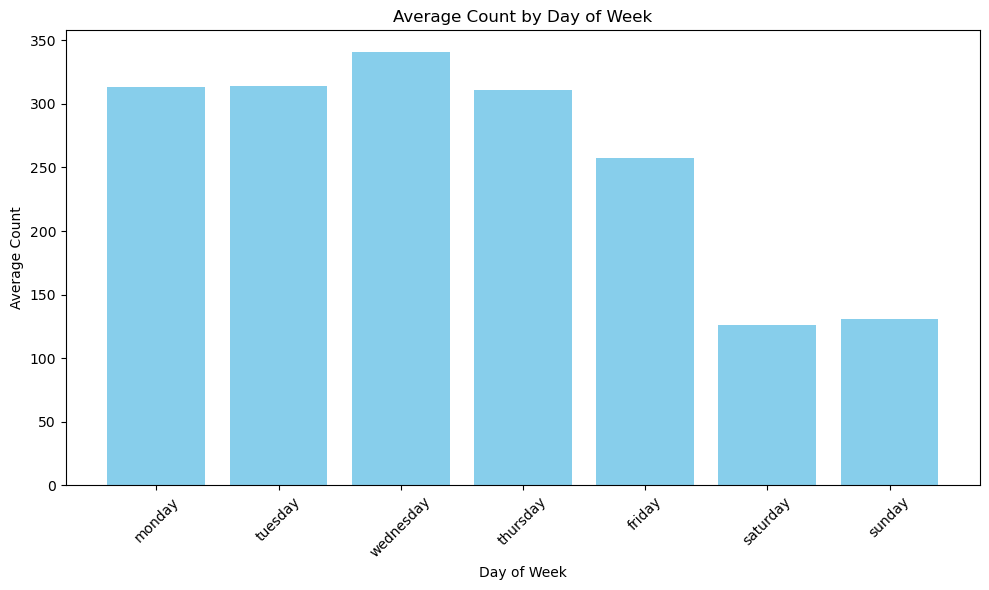

In [8]:
# Add day of week column
df['day'] = df['date'].dt.day_name().str.lower()

# Calculate average count by day of week
day_avg = df.groupby('day')['count'].agg([
    'mean',     # Average count
    'median',   # Median count
    'min',      # Minimum count
    'max',      # Maximum count
    'count'     # Number of records
]).reset_index()

# Sort by day of week (optional, but makes the output more readable)
day_order = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']
day_avg['day_order'] = day_avg['day'].map({day: i for i, day in enumerate(day_order)})
day_avg = day_avg.sort_values('day_order').drop('day_order', axis=1)

# Display the results
print("Average Count by Day of Week:")
print(day_avg)

# Save to CSV
day_avg.to_csv('day_avg_count.csv', index=False)

# Visualization of average counts
plt.figure(figsize=(10, 6))
plt.bar(day_avg['day'], day_avg['mean'], color='skyblue')
plt.title('Average Count by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('day_avg_count.png')
plt.show()
plt.close()

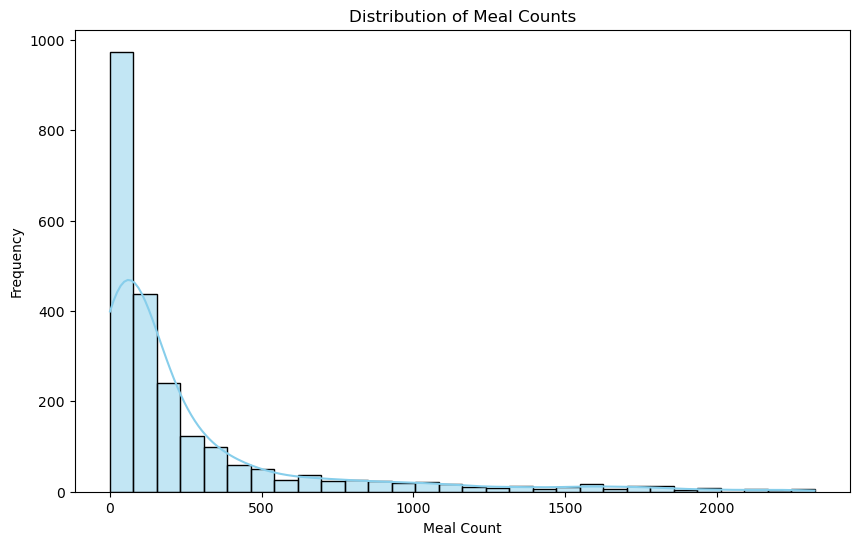

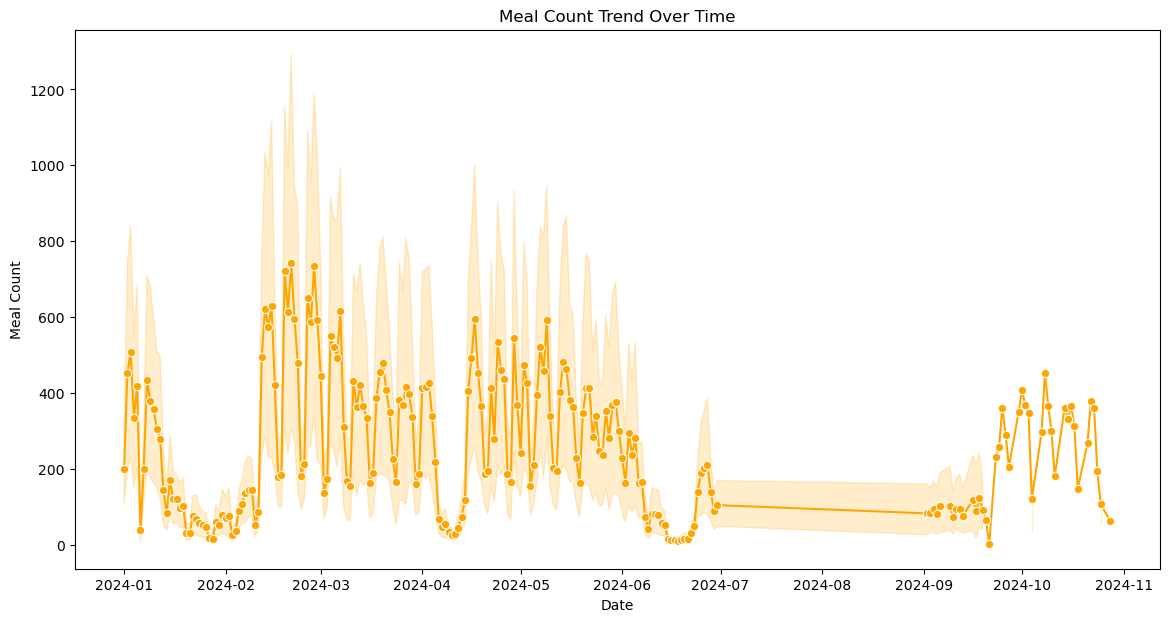

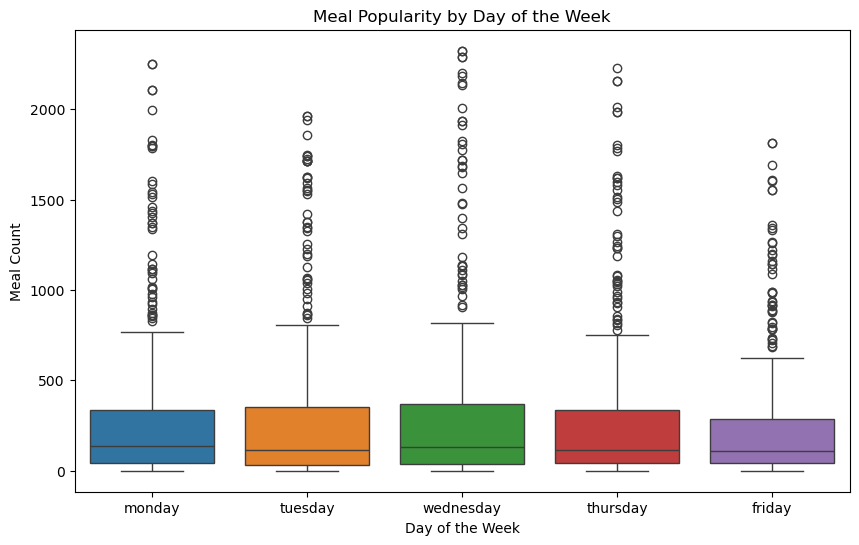

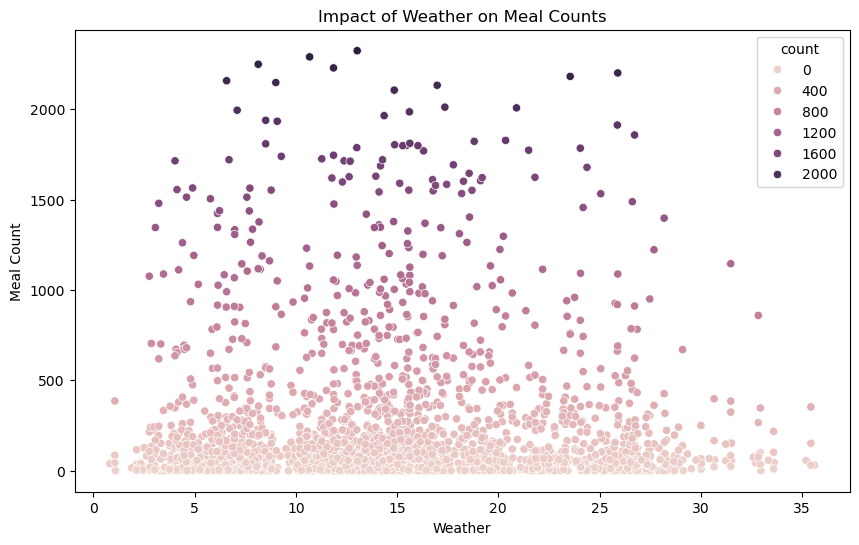

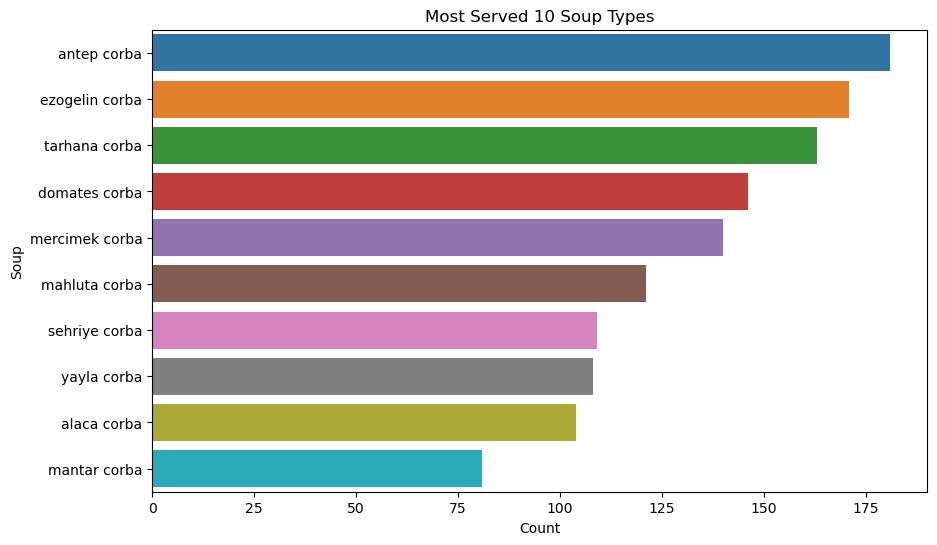

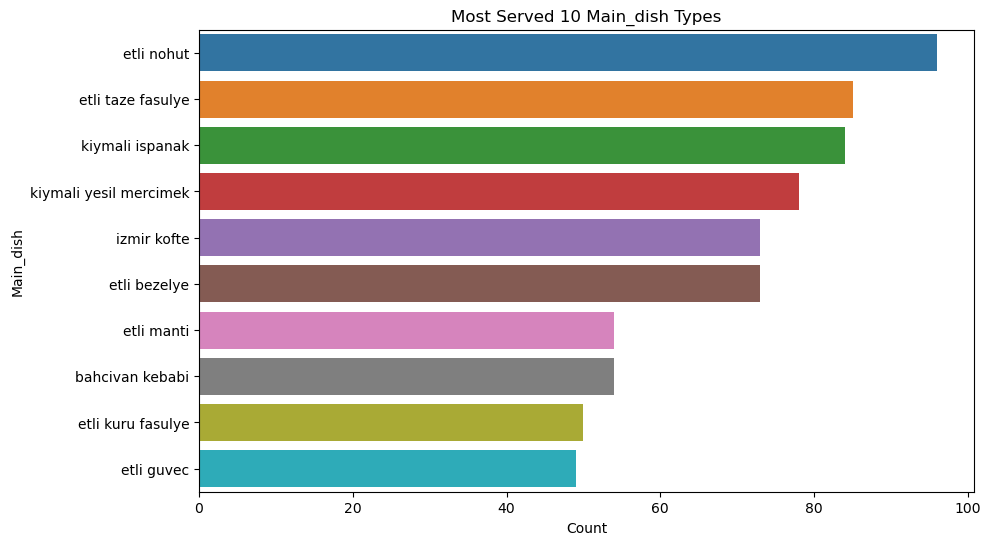

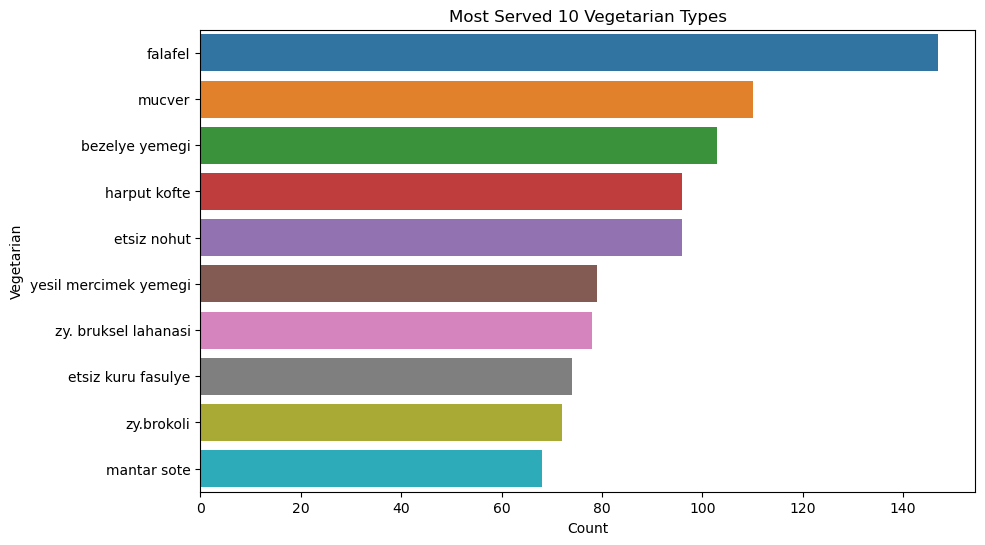

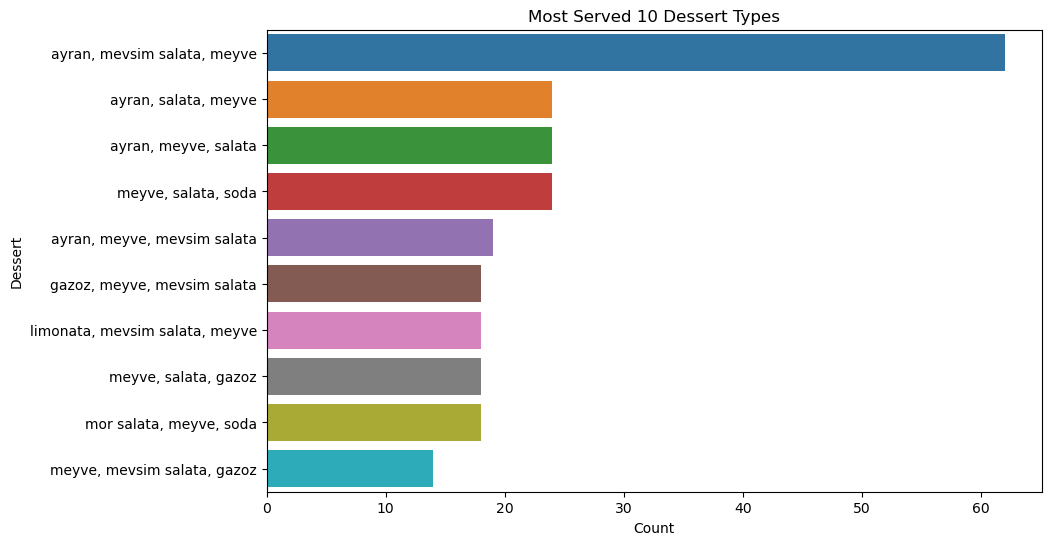

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: df Cleaning and Preparation
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Check for missing values
missing_values = df.isnull().sum()

# Fill missing values in categorical columns with 'Unknown'
categorical_columns = ['soup', 'main_dish', 'vegetarian']
for col in categorical_columns:
    df[col] = df[col].fillna('Unknown')

# Summary statistics for numerical columns
numerical_summary = df.describe()

# Step 2: Exploratory df Analysis
# Distribution of meal counts
plt.figure(figsize=(10, 6))
sns.histplot(df['count'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Meal Counts')
plt.xlabel('Meal Count')
plt.ylabel('Frequency')
plt.show()

# Meal count trends over time
plt.figure(figsize=(14, 7))
sns.lineplot(x=df['date'], y=df['count'], marker='o', color='orange')
plt.title('Meal Count Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Meal Count')
plt.show()

# Meal popularity by day of the week
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['day'], y=df['count'], order=['monday', 'tuesday', 'wednesday', 'thursday', 'friday'], hue=df['day'])
plt.title('Meal Popularity by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Meal Count')
plt.show()

# Step 3: Analysis of Weather Impact
# Scatter plot of weather vs. meal count
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['weather'], y=df['count'], hue=df['count'])
plt.title('Impact of Weather on Meal Counts')
plt.xlabel('Weather')
plt.ylabel('Meal Count')
plt.show()

# Step 4: Breakdown by Meal Components
# Count of unique values in categorical columns
meal_components_summary = {
    'soup': df['soup'].value_counts(),
    'main_dish': df['main_dish'].value_counts(),
    'vegetarian': df['vegetarian'].value_counts(),
    'dessert': df['dessert'].value_counts(),
}


# Provide visualized meal component breakdown
for component, summary in meal_components_summary.items():
    top_items = summary.head(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(y=top_items.index, x=top_items.values, hue=top_items.index, dodge=False)
    plt.title(f'Most Served 10 {component.capitalize()} Types')
    plt.xlabel('Count')
    plt.ylabel(component.capitalize())
    plt.show()


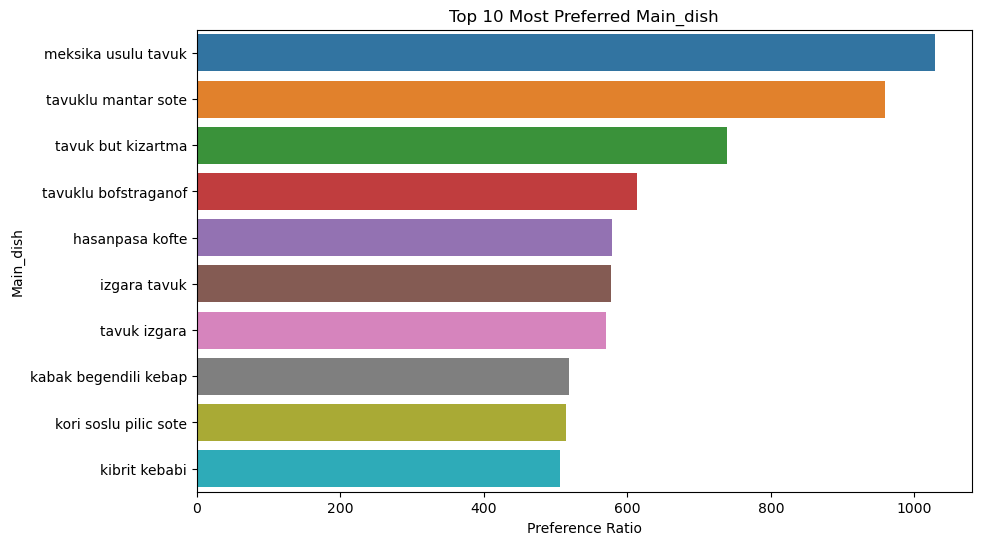

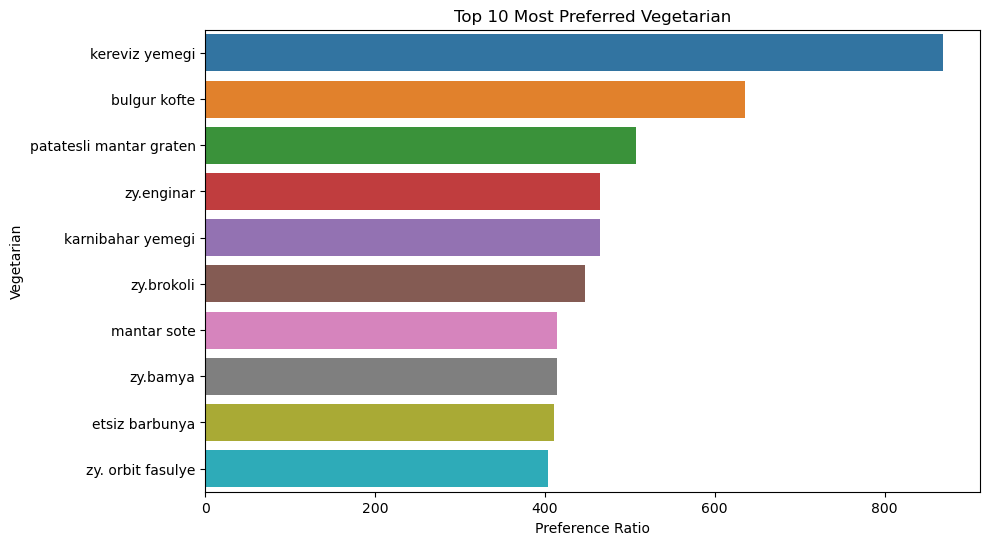

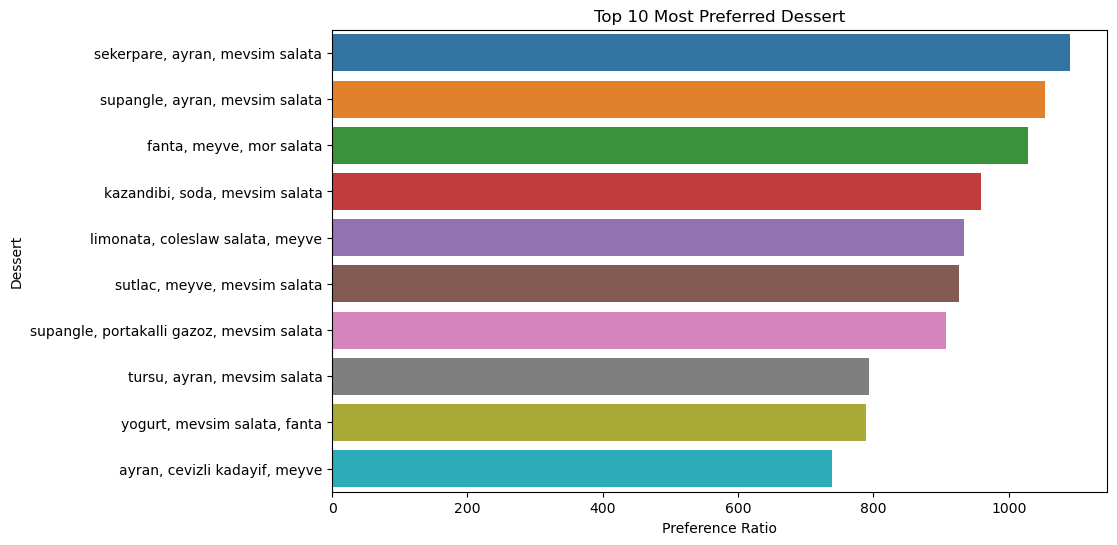

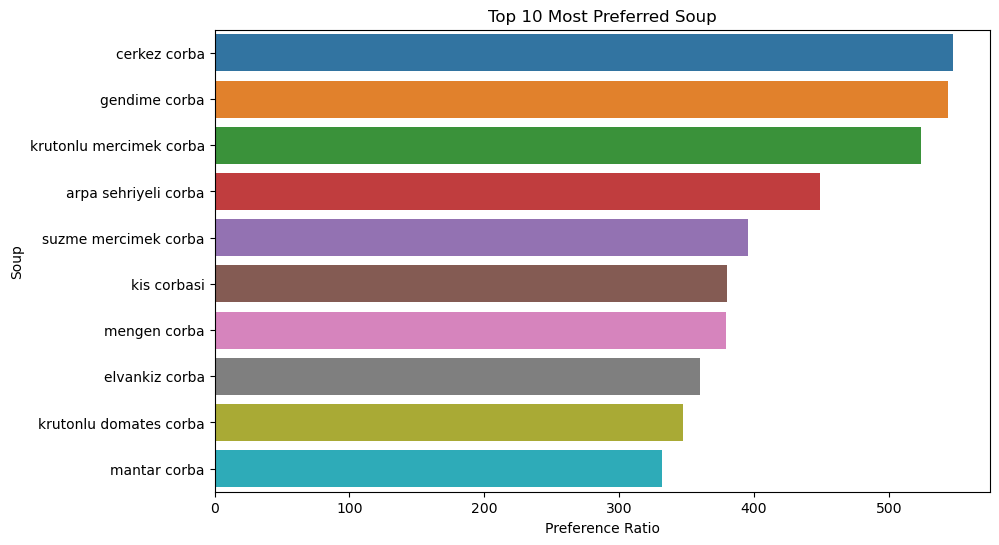

In [10]:
dish_preference = {}

for column in ['main_dish', 'vegetarian', 'dessert', 'soup']:
    served_count = df[column].value_counts()
    total_count = df.groupby(column)['count'].sum()
    preference_ratio = total_count / served_count
    preference_df = preference_ratio.sort_values(ascending=False).head(10)
    dish_preference[column] = preference_df

for dish_type, preferences in dish_preference.items():
    plt.figure(figsize=(10, 6))
    sns.barplot(y=preferences.index, x=preferences.values, hue=preferences.index)
    plt.title(f'Top 10 Most Preferred {dish_type.capitalize()}')
    plt.xlabel('Preference Ratio')
    plt.ylabel(dish_type.capitalize())
    plt.show()

In [11]:
sns.set_style("whitegrid")
sns.set_context("paper")

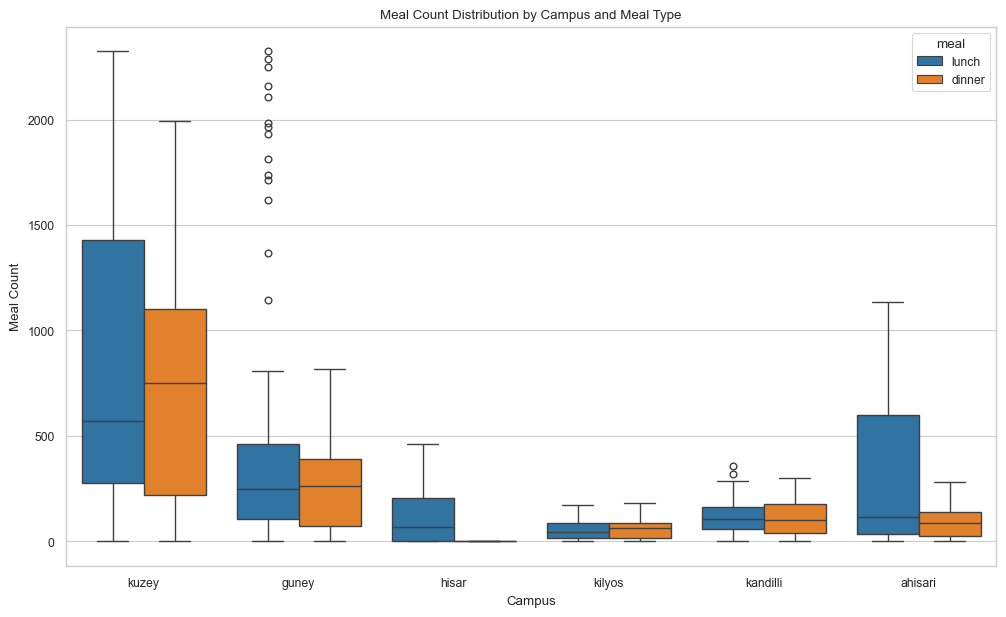

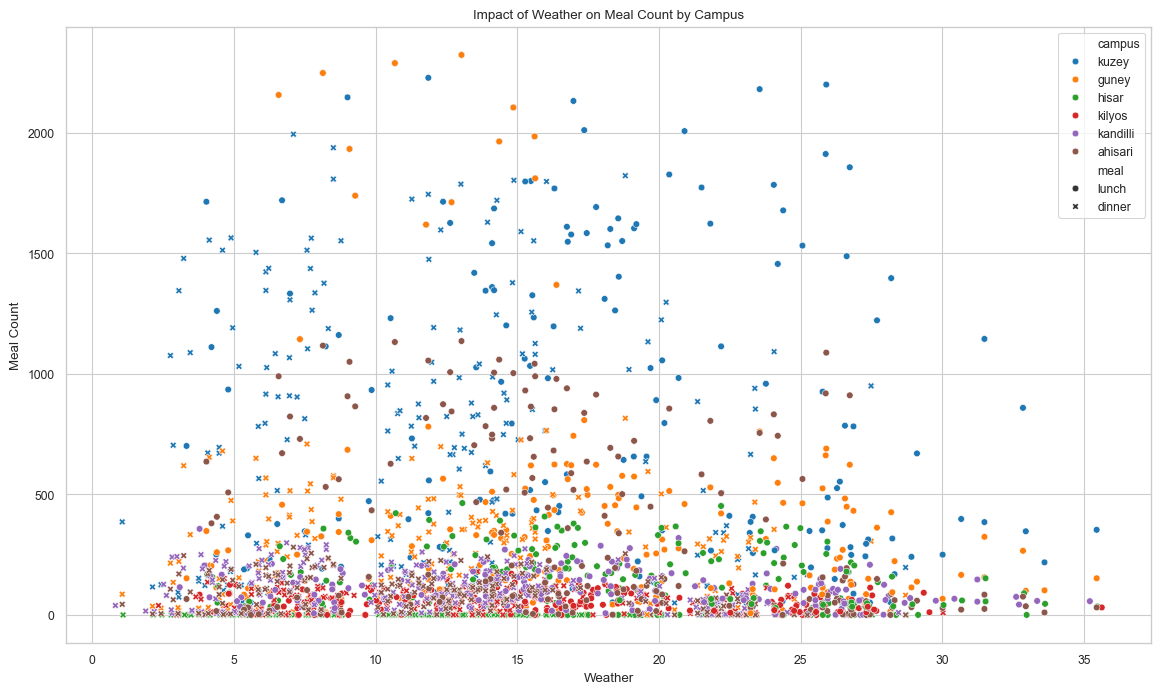

<Figure size 1400x800 with 0 Axes>

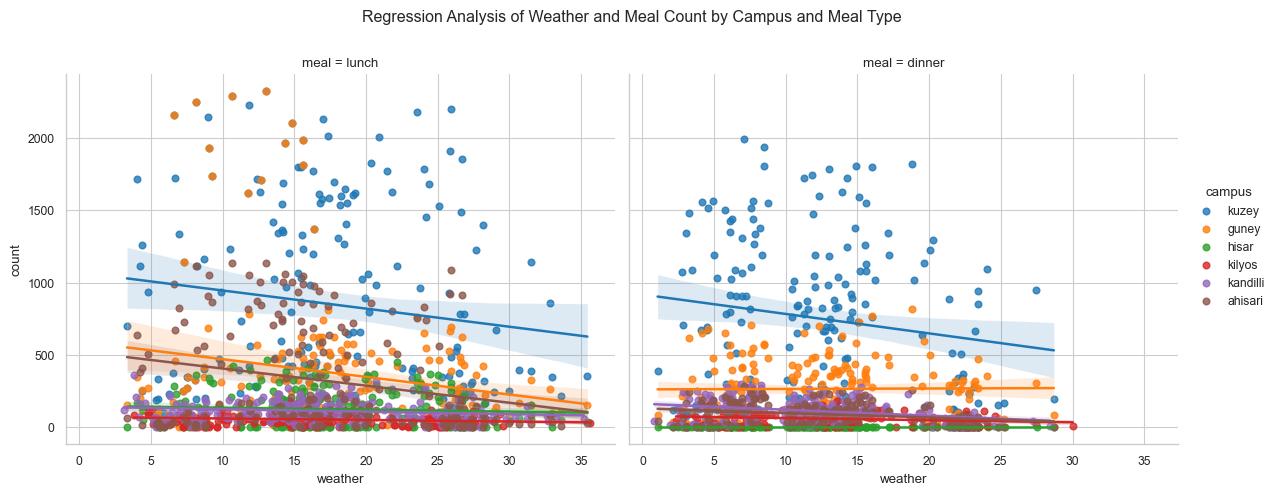

In [12]:
# Campus-wise analysis of meal counts
plt.figure(figsize=(12, 7))
sns.boxplot(x='campus', y='count', data=df, hue='meal')
plt.title('Meal Count Distribution by Campus and Meal Type')
plt.xlabel('Campus')
plt.ylabel('Meal Count')
plt.show()

# Impact of weather on meal count, separated by campus
plt.figure(figsize=(14, 8))
sns.scatterplot(x='weather', y='count', data=df, hue='campus', style='meal')
plt.title('Impact of Weather on Meal Count by Campus')
plt.xlabel('Weather')
plt.ylabel('Meal Count')
plt.show()

# Weather vs Meal Count with regression line for additional insight
plt.figure(figsize=(14, 8))
sns.lmplot(x='weather', y='count', data=df, hue='campus', col='meal', height=5, aspect=1.2)
plt.subplots_adjust(top=0.85)
plt.suptitle('Regression Analysis of Weather and Meal Count by Campus and Meal Type')
plt.show()


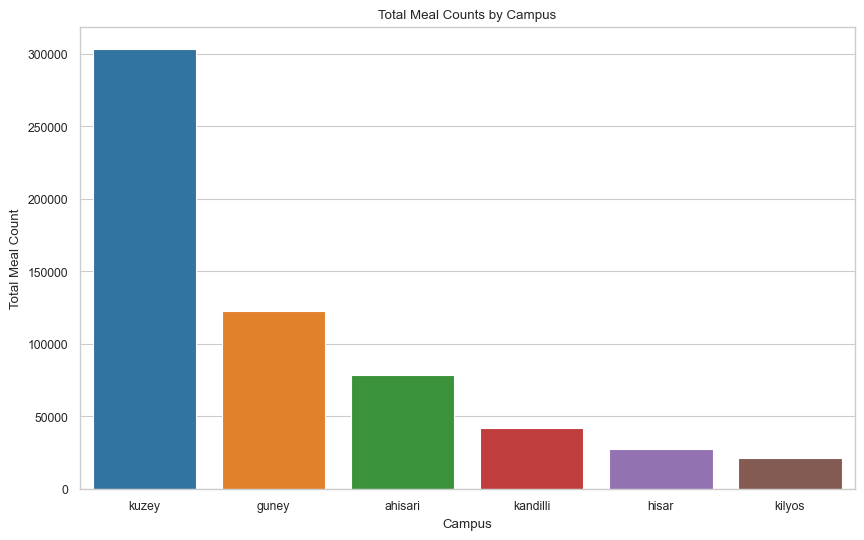

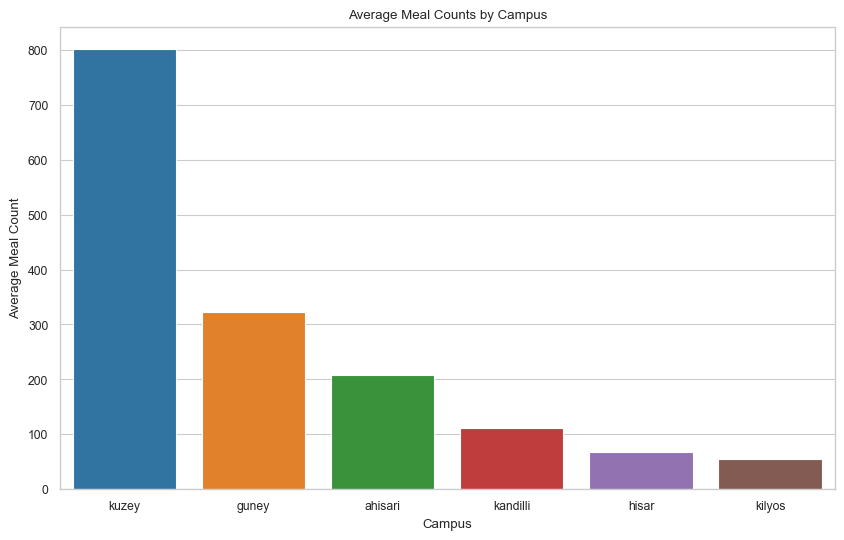

In [13]:
campus_stats = df.groupby('campus')['count'].agg(['mean', 'sum']).sort_values(by='sum', ascending=False)

# Visualize total meal counts by campus
plt.figure(figsize=(10, 6))
sns.barplot(x=campus_stats.index, y=campus_stats['sum'], hue=campus_stats.index, dodge=False)
plt.title('Total Meal Counts by Campus')
plt.xlabel('Campus')
plt.ylabel('Total Meal Count')
plt.show()

# Visualize average meal counts by campus
plt.figure(figsize=(10, 6))
sns.barplot(x=campus_stats.index, y=campus_stats['mean'], hue=campus_stats.index, dodge=False)
plt.title('Average Meal Counts by Campus')
plt.xlabel('Campus')
plt.ylabel('Average Meal Count')
plt.show()

Correlation with Meal Count:
count      1.000000
weather   -0.045932
Name: count, dtype: float64


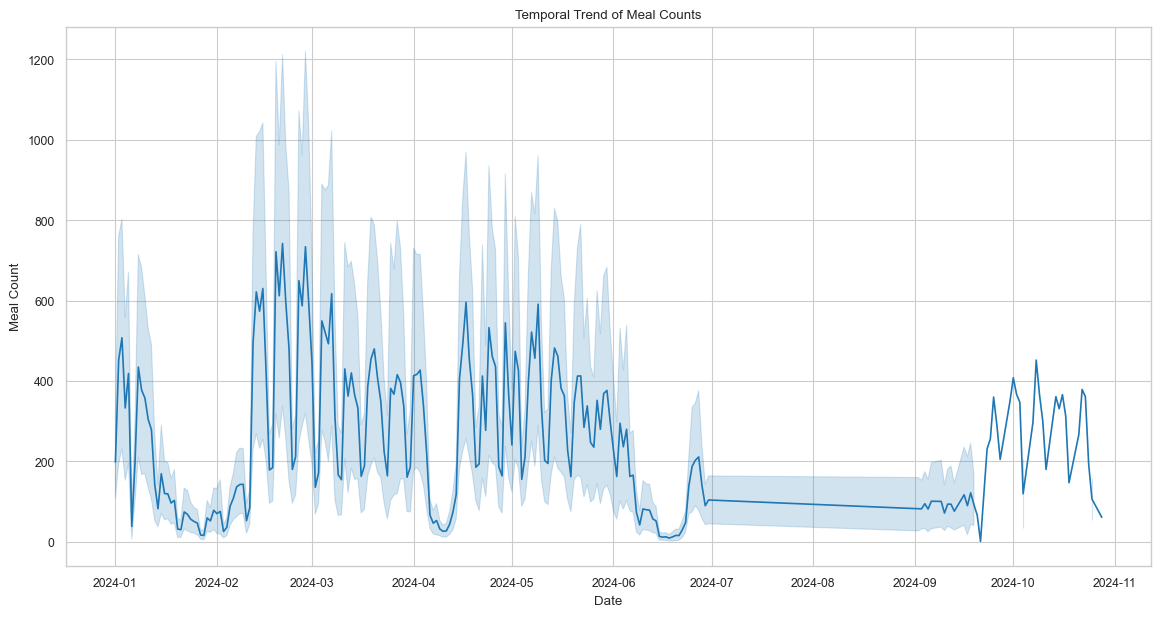

Statistics for Day:
                 mean     sum         std
day                                      
wednesday  340.931343  114212  515.324447
tuesday    314.220896  105264  461.650773
monday     313.211310  105239  457.160424
thursday   311.322388  104293  460.077061
friday     257.141566   85371  365.184489
sunday     130.964744   40861  181.115946
saturday   126.354633   39549  180.864109


Statistics for Meal:
              mean     sum         std
meal                                  
lunch   300.773256  362131  452.062004
dinner  212.667276  232658  345.728120


Statistics for Campus:
                mean     sum         std
campus                                  
kuzey     802.267196  303257  607.275356
guney     322.778364  122333  368.503657
ahisari   207.343915   78376  281.886216
kandilli  111.746032   42240   76.238138
hisar      67.928395   27511  110.419328
kilyos     55.452632   21072   41.866169


ADF Test Results:
ADF Statistic: -4.678384048066643
p-value: 9.23831

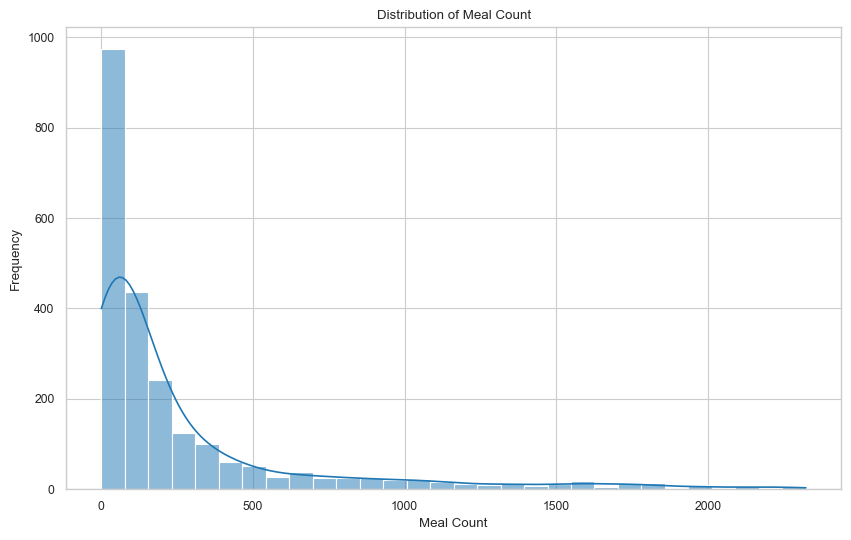

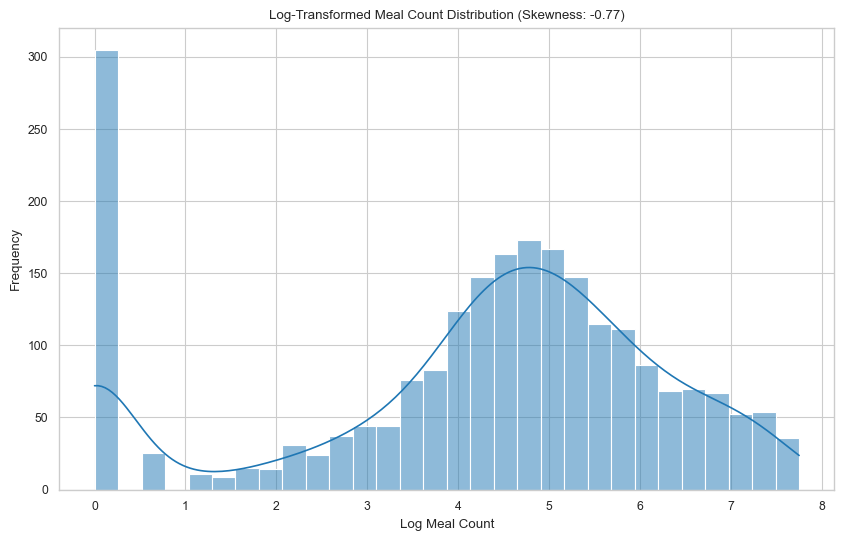

In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from scipy.stats import skew


# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Step 1: Correlation Analysis
correlation_matrix = df.corr(numeric_only=True)
count_correlation = correlation_matrix['count'].sort_values(ascending=False)

# Display correlation matrix
print("Correlation with Meal Count:")
print(count_correlation)

# Step 2: Temporal Trends
plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='count', data=df)
plt.title('Temporal Trend of Meal Counts')
plt.xlabel('Date')
plt.ylabel('Meal Count')
plt.show()

# Numerical analysis for categorical features
categorical_features = ['day', 'meal', 'campus']
categorical_stats = {}

for feature in categorical_features:
    stats = df.groupby(feature)['count'].agg(['mean', 'sum', 'std']).sort_values(by='mean', ascending=False)
    categorical_stats[feature] = stats
    print(f"Statistics for {feature.capitalize()}:")
    print(stats)
    print("\n")


# Step 5: Stationarity Testing (ADF Test)
adf_test = adfuller(df['count'])
print("ADF Test Results:")
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")
print(f"Critical Values: {adf_test[4]}")
print(f"Is Stationary: {adf_test[1] < 0.05}")

# Step 6: Target Distribution Analysis
# Original distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['count'], kde=True, bins=30)
plt.title('Distribution of Meal Count')
plt.xlabel('Meal Count')
plt.ylabel('Frequency')
plt.show()

# Log-transformed distribution
log_transformed_count = np.log1p(df['count'])
log_skewness = skew(log_transformed_count)

plt.figure(figsize=(10, 6))
sns.histplot(log_transformed_count, kde=True, bins=30)
plt.title(f'Log-Transformed Meal Count Distribution (Skewness: {log_skewness:.2f})')
plt.xlabel('Log Meal Count')
plt.ylabel('Frequency')
plt.show()


In [15]:
weather_correlation_with_total = df[['weather', 'count']].corr().iloc[0, 1]
weather_correlation_with_total

-0.04593155371692877

In [16]:
from scipy.stats import f_oneway

# Step 1: Calculate average meal counts for each main dish
main_dish_stats = df.groupby('main_dish')['count'].agg(['mean', 'std', 'count']).sort_values(by='mean', ascending=False)
overall_mean = df['count'].mean()

# Step 2: Relative popularity
main_dish_stats['relative_popularity'] = main_dish_stats['mean'] / overall_mean

# Step 3: ANOVA test to assess statistical significance
# Create a list of meal count distributions for each main dish
main_dish_groups = [group['count'].values for _, group in df.groupby('main_dish')]
anova_result = f_oneway(*main_dish_groups)

# Display results
analysis_results = {
    'Overall Average Meal Count': overall_mean,
    'Main Dish Count Correlation': df.groupby('main_dish')['count'].mean().corr(df.groupby('main_dish')['count'].sum()),
    'ANOVA F-Statistic': anova_result.statistic,
    'ANOVA p-Value': anova_result.pvalue,
}

print("Main Dish Relationship Analysis:")
for key, value in analysis_results.items():
    print(f"{key}: {value:.4f}")


Main Dish Relationship Analysis:
Overall Average Meal Count: 258.8290
Main Dish Count Correlation: 0.4029
ANOVA F-Statistic: 2.1147
ANOVA p-Value: 0.0000
